In [1]:
# 预处理步骤：
# 1.读取NIFTI格式文件，加载图片与mask
# 2.显示一层出来（包含mask）
# 3.动态显示整个扫描（多层）
# 4.构造归一化、标准化函数
# 5.处理所有文件，保存为np文件
# 6.检查np文件

In [2]:
# 先查看1.ct_3d_display.py文件

In [3]:
# 读取文件列表信息
import pandas as pd
import numpy as np

In [5]:
# 读取CSV文件信息
data = pd.read_csv('data/metadata.csv')

In [6]:
# 查看前5个文件
data.head(5)

,ct_scan,lung_mask,infection_mask,lung_and_infection_mask
0,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
1,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
2,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
3,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...
4,../input/covid19-ct-scans/ct_scans/coronacases...,../input/covid19-ct-scans/lung_mask/coronacase...,../input/covid19-ct-scans/infection_mask/coron...,../input/covid19-ct-scans/lung_and_infection_m...


In [7]:
#  获取第一行文件路径
# 原始图像
ct_scan_sample_file = data.loc[0,'ct_scan'].replace('../input/covid19-ct-scans','data')
# 肺部mask
lung_mask_sample_file = data.loc[0,'lung_mask'].replace('../input/covid19-ct-scans','data')
# 感染mask
infection_mask_sample_file = data.loc[0,'infection_mask'].replace('../input/covid19-ct-scans','data')
# 腹部和感染mask
lung_and_infection_mask_sample_file = data.loc[0,'lung_and_infection_mask'].replace('../input/covid19-ct-scans','data')

In [8]:
ct_scan_sample_file

'data/ct_scans/coronacases_org_001.nii'

In [12]:
import nibabel as nib

In [13]:
# 读取nifti文件
def read_nii_file(fileName):
    img = nib.load(fileName)
    img_data = img.get_fdata()
    img_data   = np.rot90(np.array(img_data))
    return img_data

In [14]:
# 读取
ct_scan_imgs = read_nii_file(ct_scan_sample_file)
lung_mas_imgs = read_nii_file(lung_mask_sample_file)
infection_mask_imgs = read_nii_file(infection_mask_sample_file)
lung_and_infection_mas_imgs = read_nii_file(lung_and_infection_mask_sample_file)

In [15]:
# 查看大小
print(ct_scan_imgs.shape)
print(lung_mas_imgs.shape)

(512, 512, 301)
(512, 512, 301)


In [16]:
# 绘制
import matplotlib.pyplot as plt

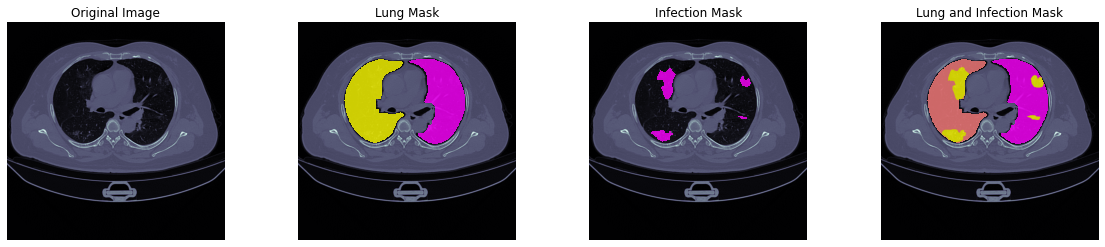

In [17]:
color_map = 'spring'
layer_index = 180
fig = plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.imshow(ct_scan_imgs[:,:,layer_index], cmap='bone')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(ct_scan_imgs[:,:,layer_index], cmap='bone')
mask_ = np.ma.masked_where(lung_mas_imgs[:,:,layer_index]== 0, lung_mas_imgs[:,:,layer_index])
plt.imshow(mask_, alpha=0.8, cmap=color_map)
plt.title('Lung Mask')
plt.axis('off')


plt.subplot(1,4,3)
plt.imshow(ct_scan_imgs[:,:,layer_index], cmap='bone')
mask_ = np.ma.masked_where(infection_mask_imgs[:,:,layer_index]== 0, infection_mask_imgs[:,:,layer_index])
plt.imshow(mask_, alpha=0.8, cmap=color_map)
plt.title('Infection Mask')
plt.axis('off')


plt.subplot(1,4,4)
plt.imshow(ct_scan_imgs[:,:,layer_index], cmap='bone')
mask_ = np.ma.masked_where(lung_and_infection_mas_imgs[:,:,layer_index]== 0, lung_and_infection_mas_imgs[:,:,layer_index])
plt.imshow(mask_, alpha=0.8, cmap=color_map)
plt.title('Lung and Infection Mask')
plt.axis('off')


plt.show()

In [18]:
from celluloid import Camera
from IPython.display import HTML
import tqdm

100%|████████████████████████████████████████████████████████████████████████████████| 301/301 [00:03<00:00, 85.61it/s]


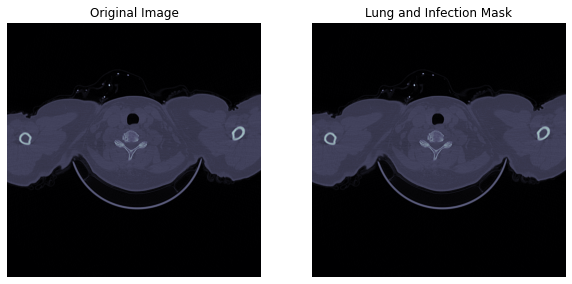

In [19]:
# 将每层画面制作成视频
fig = plt.figure(figsize=(10, 10))
camera = Camera(fig)

for layer_index in tqdm.tqdm(range(ct_scan_imgs.shape[-1])):
    
    plt.subplot(1, 2, 1)
    plt.imshow(ct_scan_imgs[:,:,layer_index], cmap='bone')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(ct_scan_imgs[:,:,layer_index], cmap='bone')
    mask_ = np.ma.masked_where(lung_and_infection_mas_imgs[:,:,layer_index]== 0, lung_and_infection_mas_imgs[:,:,layer_index])
    plt.imshow(mask_, alpha=0.8, cmap=color_map)
    plt.title('Lung and Infection Mask')
    plt.axis('off')
    
    camera.snap()
    
animation = camera.animate()


In [20]:
# 显示动画
HTML(animation.to_html5_video())

In [21]:
ct_scan_imgs.max(),ct_scan_imgs.min()

(2996.0, -1021.0)

In [ ]:
# 标准化、归一化

### 标准化
$$x'= \frac{x-mean(x)}{\sigma}$$
### 归一化
$$x'= \frac{x-min(x)}{max(x)-min(x)}$$

In [22]:
# 标准化
def standardize(data):
    # 计算均值
    mean = data.mean()
    # 计算标准差
    std = np.std(data)
    # 计算结果
    standardized = (data - mean) / std
    return standardized
# 归一化
def normalize(data):
    # 计算最大最小值
    max_val = data.max()
    min_val = data.min()
    normalized = (data - min_val) / (max_val - min_val)
    return normalized

In [23]:
std = standardize(ct_scan_imgs)

In [24]:
std.max(),std.min()

(7.434105842837755, -0.8964882335602814)

In [25]:
normalize(std).max(),normalize(std).min()

(1.0, 0.0)

In [ ]:
# 处理所有文件

In [ ]:
import glob
import os

In [28]:
train_file_list =[file_path.replace('../input/covid19-ct-scans','data') for file_path in data.loc[:,'ct_scan']] 
train_label_list = [file_path.replace('../input/covid19-ct-scans','data') for file_path in data.loc[:,'infection_mask']] 

In [30]:
# train_file_list

In [31]:
# 查看文件数量（注意：每隔文件中都包含多个层图片）
len(train_file_list)

20

In [ ]:
import cv2

In [ ]:
for index,file in  tqdm.tqdm(enumerate(train_file_list)):
    # 读取文件和label
    # 标准化和归一化
    # 存入文件夹
    # 缩放至模型所需大小256
    
    
    # 读取
    img = nib.load(file)
    mask = nib.load(train_label_list[index])
    
    img_data = img.get_fdata()
    mask_data = mask.get_fdata().astype(np.uint8)
    
    
    # 标准化和归一化
    std = standardize(img_data)
    normalized = normalize(std)
    
    # 分为训练数据和测试数据
    if index < 17:
        save_dir = 'processed/train/'
    else:
        save_dir = 'processed/test/'
        
    
    # 遍历所有层，分层存入文件夹，存储路径格式：'processed/train/0/img_0.npy'，'processed/train/0/label_0.npy'，
    layer_num = normalized.shape[-1]
    for i in range(layer_num):
        layer = normalized[:,:,i]
        mask = mask_data[:,:,i]
        # 缩放
        layer = cv2.resize(layer, (256, 256))
        mask = cv2.resize(mask, (256, 256), interpolation=cv2.INTER_NEAREST)
        
        # 创建文件夹
        img_dir = save_dir + str(index)
        if not os.path.exists(img_dir):
            os.makedirs(img_dir)
        # 保存为npy文件
        np.save( img_dir+'/img_'+str(i), layer )
        np.save( img_dir+'/label_'+str(i), mask )
        

In [36]:
import glob

In [37]:
# 测试一组数据
# 解决排序混乱问题
from natsort import natsorted # pip install natsort

In [38]:
img_test =natsorted( glob.glob('processed/train/10/img*'))
label_test = natsorted( glob.glob('processed/train/10/label*') )

In [39]:
len(img_test)

39

In [40]:
# img_test

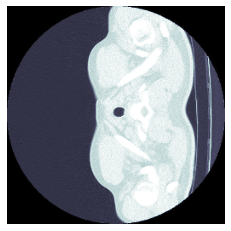

In [41]:
fig = plt.figure()
camera = Camera(fig)

for index,img_file in enumerate(img_test):
    img_data = np.load(img_file)
    mask_data = np.load(label_test[index])
    plt.imshow(img_data, cmap='bone')
    mask_ = np.ma.masked_where(mask_data== 0, mask_data)
    plt.imshow(mask_, alpha=0.8, cmap="spring")
    plt.axis('off')
    camera.snap()
animation = camera.animate()

In [42]:
# 显示动画
HTML(animation.to_html5_video())

In [ ]:
# np.array([False,True]).astype(np.uint8)